## Import des packages

In [1]:
import pandas as pd
import plotly.express as px

## Import des données

In [2]:
data_pop = pd.read_csv("etat_civil_metropole_grenoble.csv") 
#si le fichier est dans le même dossier que le notebook, sinon indiquer le chemin avant le nom du fichier

In [3]:
data_pop.head()

,annee,nombre_naissances,nombre_deces,jeu_de_donnees,code_insee,commune,trigram,code_postal
2019,89,95,GEO2020RFD2019,38562,Vizille,VIZ,38220,NaN
2018,80,100,GEO2020RFD2018,38562,Vizille,VIZ,38220,NaN
2017,72,98,GEO2020RFD2017,38562,Vizille,VIZ,38220,NaN
2016,84,88,GEO2020RFD2016,38562,Vizille,VIZ,38220,NaN
2015,102,97,GEO2020RFD2015,38562,Vizille,VIZ,38220,NaN


## Préparation des données

Problème sur ce dataset : à cause de "," à la fin de chaque ligne, Python a créé une dernière colonne faite de "NaN", utilisé la 1ère colonne comme index et décalé les noms de colonnes. Résolvons ce problème.

In [4]:
noms_col = data_pop.columns
data_pop.reset_index(inplace=True)
data_pop.drop(["code_postal"],axis=1,inplace=True)
data_pop.columns = noms_col
data_pop

,annee,nombre_naissances,nombre_deces,jeu_de_donnees,code_insee,commune,trigram,code_postal
0,2019,89,95,GEO2020RFD2019,38562,Vizille,VIZ,38220
1,2018,80,100,GEO2020RFD2018,38562,Vizille,VIZ,38220
2,2017,72,98,GEO2020RFD2017,38562,Vizille,VIZ,38220
3,2016,84,88,GEO2020RFD2016,38562,Vizille,VIZ,38220
4,2015,102,97,GEO2020RFD2015,38562,Vizille,VIZ,38220
...,...,...,...,...,...,...,...,...
632,2011,170,63,RFD2011,38317,Le Pont-de-Claix,PDC,38800
633,2010,162,71,RFD2010,38317,Le Pont-de-Claix,PDC,38800
634,2009,193,70,RFD2009,38317,Le Pont-de-Claix,PDC,38800
635,2008,155,74,RFD2008,38317,Le Pont-de-Claix,PDC,38800


In [5]:
data_pop_gre = data_pop[data_pop["commune"] == "Grenoble"]

## Créer un graphique avec Plotly Express

Evolution du nombre de naissances à Grenoble, par commune

line, bar

color / legend

labels

update_layout

In [9]:
fig = px.line(data_pop_gre, x="annee", y="nombre_naissances",
             title="Evolution du nombre de naissances à Grenoble",
             labels={"annee":"Année","nombre_naissances":"Nombre de naissances"}) #noms des axes
fig.update_layout(yaxis_range=[0,3000]) #limites de la fenêtre en ordonnées
fig.show()

In [10]:
fig = px.line(data_pop, x="annee", y="nombre_naissances",
              color="commune", #couleur selon la variable "commune"
             title="Evolution du nombre de naissances à Grenoble",
             labels={"annee":"Année","nombre_naissances":"Nombre de naissances"})
fig.update_layout(yaxis_range=[0,3000])
fig.show()

In [11]:
fig = px.bar(data_pop_gre, x="annee", y="nombre_naissances",
             title="Evolution du nombre de naissances à Grenoble",
             labels={"annee":"Année","nombre_naissances":"Nombre de naissances"})
fig.update_layout(yaxis_range=[0,3000])
fig.show()

In [13]:
fig = px.bar(data_pop, x="annee", y="nombre_naissances",
             color="commune",
             title="Evolution du nombre de naissances à Grenoble",
             labels={"annee":"Année","nombre_naissances":"Nombre de naissances"})
fig.show()

## Lire des données géographiques

In [15]:
import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

import matplotlib
import geopandas as gpd


Lire des données : "bornes recharge véhicules électriques métro grenoble.json", "taux_pauvrete_grenoble_iris.csv" (sur Moodle)

In [16]:
data_bornes = gpd.read_file("bornes recharge véhicules électriques métro grenoble.json")

In [18]:
data_bornes.head()

,n_amenageur,n_operateur,n_enseigne,id_station,n_station,ad_station,code_insee,Xlongitude,Ylatitude,nbre_pdc,epci,commune,id,CODE,type,pdc,geometry
0,Grenoble-Alpes Métropole,BOUYGUES ENERGIES ET SERVICES,Grenoble,FR*M38*P38421*001,SAINT-MARTIN-D'HERES - Avenue Centrale - BU,Avenue Centrale 38400 SAINT-MARTIN-D'HERES,38421,5.769781,45.19160,1,LaMetro,Saint-Martin-d'Hères,FR*M38*P38421*001,FR*M38*P38421*001,irve,"[ { ""id_pdc"": ""FR*M38*E38421*001*1"", ""puiss_ma...",POINT (5.76978 45.19160)
1,Grenoble-Alpes Métropole,BOUYGUES ENERGIES ET SERVICES,Grenoble,FR*M38*P38185*002,GRENOBLE - Rue Jacquard - Balzac,Rue Jacquard 38000 GRENOBLE,38185,5.724746,45.17461,2,LaMetro,Grenoble,FR*M38*P38185*002,FR*M38*P38185*002,irve,"[ { ""id_pdc"": ""FR*M38*E38185*002*1"", ""puiss_ma...",POINT (5.72475 45.17461)
2,Grenoble-Alpes Métropole,BOUYGUES ENERGIES ET SERVICES,Grenoble,FR*M38*P38185*018,GRENOBLE - Rue Thiers,Rue Thiers 38000 GRENOBLE,38185,5.719674,45.18509,1,LaMetro,Grenoble,FR*M38*P38185*018,FR*M38*P38185*018,irve,"[ { ""id_pdc"": ""FR*M38*E38185*018*1"", ""puiss_ma...",POINT (5.71967 45.18509)
3,Grenoble-Alpes Métropole,BOUYGUES ENERGIES ET SERVICES,Grenoble,FR*M38*P38485*001,SEYSSINET-PARISET - Rue Lamartine,Rue Lamartine 38170 SEYSSINET-PARISET,38485,5.695541,45.17999,2,LaMetro,Seyssinet-Pariset,FR*M38*P38485*001,FR*M38*P38485*001,irve,"[ { ""id_pdc"": ""FR*M38*E38485*001*2"", ""puiss_ma...",POINT (5.69554 45.17999)
4,Grenoble-Alpes Métropole,BOUYGUES ENERGIES ET SERVICES,Grenoble,FR*M38*P38185*015,GRENOBLE - Place De Lavalette - ND - Musée,Place De Lavalette 38000 GRENOBLE,38185,5.731627,45.19407,1,LaMetro,Grenoble,FR*M38*P38185*015,FR*M38*P38185*015,irve,"[ { ""id_pdc"": ""FR*M38*E38185*015*1"", ""puiss_ma...",POINT (5.73163 45.19407)


In [19]:
type(data_bornes) #lecture avec gpd.read_file : déjà une GeoDataFrame

geopandas.geodataframe.GeoDataFrame

In [20]:
data_pauvrete = pd.read_csv("taux_pauvrete_grenoble_iris.csv")

In [21]:
data_pauvrete.head()

,IRIS,Taux de pauvreté,Nom IRIS,Commune,geometry
0,381850102,18.0,Jean Macé,Grenoble,POLYGON ((5.698869586747465 45.208610482032135...
1,381850103,16.7,Europole,Grenoble,"POLYGON ((5.703190852556995 45.19257539821455,..."
2,381850104,12.1,Diderot,Grenoble,"POLYGON ((5.704671399829011 45.19215393076612,..."
3,381850105,NaN,Gare,Grenoble,"POLYGON ((5.7203094134 45.19207936011034, 5.72..."
4,381850106,22.6,Cours Berriat,Grenoble,POLYGON ((5.7093027000225325 45.18737110866366...


In [24]:
type(data_pauvrete) #lecture avec pd.read_csv : pas encore une GeoDataFrame

pandas.core.frame.DataFrame

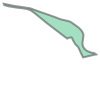

In [27]:
shapely.wkt.loads(data_pauvrete.geometry.iloc[0]) #voici ce que contient la 1ère ligne de la variable "geometry"

In [28]:
#on convertit la variable "geometry" en objet géométrique (c'était une string)
data_pauvrete.geometry =  data_pauvrete.geometry.apply(lambda pt: shapely.wkt.loads(pt)) 

#on convertit la DataFrame en GeoDataFrame
data_pauvrete = gpd.GeoDataFrame(data_pauvrete)

In [29]:
type(data_pauvrete)

geopandas.geodataframe.GeoDataFrame

## Visualiser les cartes de façon statique

df.plot()

<AxesSubplot: >

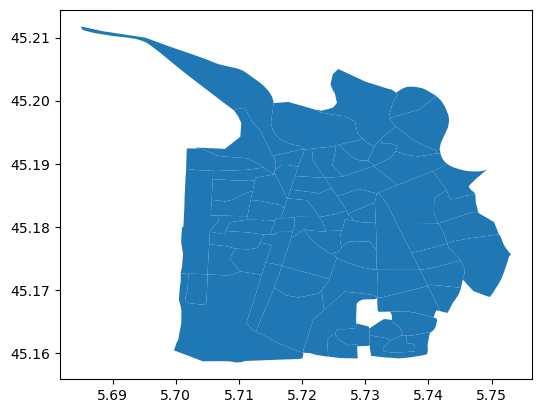

In [30]:
data_pauvrete.plot()

<AxesSubplot: >

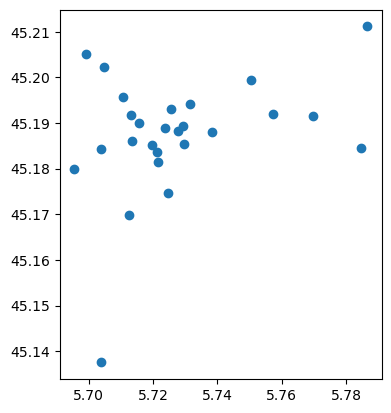

In [31]:
data_bornes.plot()

## Créer des cartes interactives avec Plotly

In [35]:
fig = px.scatter_mapbox(data_bornes,lat="Ylatitude", lon="Xlongitude", 
                        mapbox_style="carto-positron", #fond de carte
                        custom_data=["n_station","id_station"]) #pour customiser les variables qui apparaissent dans l'étiquette (quand on survole)

fig.update_traces(hovertemplate="<br>".join([ "Nom station : %{customdata[0]}", "ID station : %{customdata[1]}" ])) #pour customiser les variables qui apparaissent dans l'étiquette (quand on survole)
fig.show()

In [46]:
fig = px.choropleth_mapbox(data_pauvrete,geojson = data_pauvrete["geometry"],
                          locations = data_pauvrete.index,
                          mapbox_style="carto-positron",
                           color='Taux de pauvreté', #variable numérique qui indique la coloration des polygones
                           color_continuous_scale="YlOrRd", #choix du dégradé de couleur (ici Yellow-Orange-Red)
                           range_color=(0, 100), #dégradé pour les valeurs de 0 à 100 (par défaut : du min au max du taux de pauvreté)
                          zoom=11, center = {"lat": 45.18, "lon": 5.7}, #positionnement par défaut de la carte
                          opacity=0.5) #niveau de transparence des couleurs des polygones
fig.show()